# WorldBank Global Financial Development

The Global Financial Development Database is an extensive dataset of financial system characteristics for 203 economies. The database includes measures of 
1. size of financial institutions and markets (**financial depth**),
2. degree to which individuals can and do use financial services (**access**), 
3. efficiency of financial intermediaries and markets in intermediating resources and facilitating financial transactions (**efficiency**), and 
4. stability of financial institutions and markets (**stability**). 

For a complete description of the dataset and a discussion of the underlying literature, see: Martin Cihák, Asli Demirgüç-Kunt, Erik Feyen, and Ross Levine, 2012. Benchmarking Financial Systems Around the World. World Bank Policy Research Working Paper 6175, World Bank, Washington, D.C.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
# read csv
apac = pd.read_csv('apac-findev.csv',header=0)
apac['Series Code'] = apac['Series Code'].map(lambda x: x[5:])
apac.set_index(['Country Code', 'Series Code'], inplace=True, drop=True)
apac.index.names = ['cc', 'sc']

cc = dict(zip(apac['Country Name'].unique(), apac.index.get_level_values(0).unique()))
sc = dict(zip(apac.index.get_level_values(1).tolist(), apac['Series Name']))
apac.drop(['Country Name', 'Series Name'], axis=1, inplace=True)
apac.rename(columns=dict(zip(apac.columns, list(map(lambda x: x[:4], apac.columns.values)))), inplace=True)

apac = apac.replace({'..':np.nan})
apac = apac.astype('float', errors='raise')

In [9]:
"""
returns a boolean mask to filter a category

indicator_filter(characteristic, system)
characteristic: depth, access, efficiency, stability
system: institutions or markets

returns: a boolean mask
"""
def ind_fil(ind=None): 
    i_list = list(ind)
    c = i_list[0]
    s = i_list[1]
    
    if (c != None) & (s != None):
        criteria = list(map( lambda x: (x[0] == c.upper()) & (x[1] == s.upper()) , apac.index.get_level_values(1)) )
    elif c != None:
        criteria = list(map( lambda x: x[0] == c.upper() , apac.index.get_level_values(1) ))
    elif s != None:
        criteria = list(map( lambda x: x[1] == s.upper() , apac.index.get_level_values(1) ))
    
    return criteria                                       

In [10]:
di = apac.loc[ind_fil(ind='di')]
ai = apac.loc[ind_fil(ind='ai')]
ei = apac.loc[ind_fil(ind='ei')]
si = apac.loc[ind_fil(ind='si')]

In [11]:
pd.set_option('max_colwidth', 100)

In [236]:
def plot_line(df,c):
    ax = plt.figure(figsize=(20,10))
    for index, row in df.iterrows():
        plt.plot(row, marker='.',label=index[1])
        
    plt.title(c)    
    plt.legend()

In [247]:
sc

{'OI.06': '5-bank asset concentration',
 'AI.05': 'Account at a formal financial institution (% age 15+)',
 'AI.08': 'Account used for business purposes (% age 15+)',
 'AI.09': 'Account used to receive government payments (% age 15+)',
 'AI.10': 'Account used to receive remittances (% age 15+)',
 'AI.11': 'Account used to receive wages (% age 15+)',
 'AI.25': 'ATMs per 100,000 adults',
 'AI.01': 'Bank accounts per 1,000 adults',
 'AI.02': 'Bank branches per 100,000 adults',
 'SI.03': 'Bank capital to total assets (%)',
 'OI.01': 'Bank concentration (%)',
 'EI.07': 'Bank cost to income ratio (%)',
 'SI.04': 'Bank credit to bank deposits (%)',
 'OI.02': 'Bank deposits to GDP (%)',
 'EI.02': 'Bank lending-deposit spread',
 'EI.01': 'Bank net interest margin (%)',
 'EI.03': 'Bank noninterest income to total income (%)',
 'SI.02': 'Bank non-performing loans to gross loans (%)',
 'EI.04': 'Bank overhead costs to total assets (%)',
 'SI.05': 'Bank regulatory capital to risk-weighted assets (%

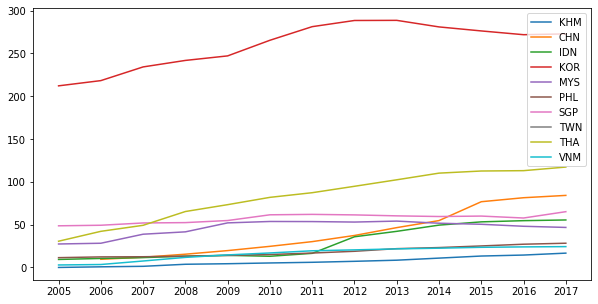

In [12]:
ai25 = apac.xs('AI.25', level='sc').iloc[:,12:]

plt.figure(figsize=(10,5))

#plt.plot(ai25.loc['VNM'])
for index, row in ai25.iterrows():
    plt.plot(row, label=index)

plt.legend()
plt.show()

In [255]:
data = ai25['2017']
data

cc
KHM     16.7244
CHN     84.1623
IDN     55.4767
KOR    272.8200
MYS     46.7511
PHL     28.3058
SGP     65.1585
TWN         NaN
THA    117.2790
VNM     24.3360
Name: 2017, dtype: float64

In [1]:
import geopandas as gpd
asiamap = gpd.read_file('custom.geo.json')
apacmap = asiamap[(asiamap['subregion']=='Eastern Asia') | (asiamap['subregion']=='South-Eastern Asia')].drop([6, 9, 17, 34, 37, 40, 46])

In [2]:
apacmap = apacmap[['admin', 'adm0_a3', 'geometry']]
apacmap.rename(columns={'adm0_a3': 'cc', 'admin': 'cn'}, inplace=True)
apacmap

,cn,cc,geometry
4,China,CHN,"MULTIPOLYGON (((110.88877 19.99194, 110.93828 ..."
21,Indonesia,IDN,"MULTIPOLYGON (((122.94893 -10.90928, 122.85586..."
22,Cambodia,KHM,"MULTIPOLYGON (((103.31777 10.71851, 103.28125 ..."
25,Laos,LAO,"POLYGON ((102.12744 22.37920, 102.18301 22.284..."
27,South Korea,KOR,"MULTIPOLYGON (((126.32695 33.22363, 126.28203 ..."
30,Myanmar,MMR,"MULTIPOLYGON (((98.18262 9.93345, 98.13438 9.8..."
31,Malaysia,MYS,"MULTIPOLYGON (((111.38926 2.41533, 111.35869 2..."
36,Philippines,PHL,"MULTIPOLYGON (((120.25039 5.25659, 120.22324 5..."
41,Thailand,THA,"MULTIPOLYGON (((99.66309 6.52192, 99.64404 6.5..."
42,Singapore,SGP,"POLYGON ((103.96973 1.33145, 103.81992 1.26538..."


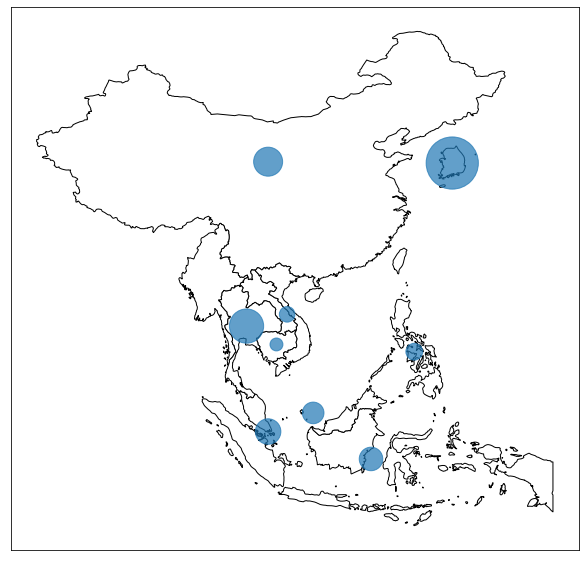

In [268]:
fig, ax = plt.subplots(figsize=(30,10))
apacmap.plot(ax=ax, color='w', edgecolor='black')

data = pd.merge(apacmap, ai25['2017'], left_on='cc', right_on='cc')
data_p = data['geometry'].centroid
data_p.plot(ax=ax, markersize=data['2017']*10, alpha=0.7)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

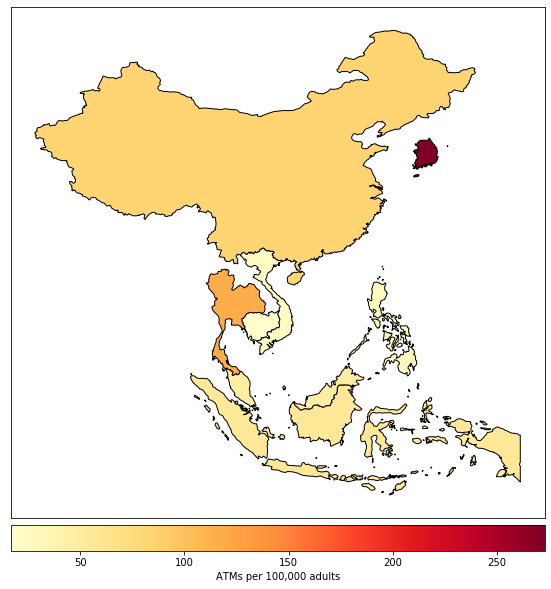

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(30,10))
data = pd.merge(apacmap, ai25['2017'], left_on='cc', right_on='cc').dropna()

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

data.plot(ax=ax, column='2017', cmap='YlOrRd', edgecolor='black',
          legend=True, cax = cax,
          legend_kwds={'label': sc['AI.25'], 'orientation':'horizontal'})

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

In [15]:
data

,cn,cc,geometry,2017
0,China,CHN,"MULTIPOLYGON (((110.88877 19.99194, 110.93828 19.94756, 110.97070 19.88330, 110.99766 19.76470, ...",84.1623
1,Indonesia,IDN,"MULTIPOLYGON (((122.94893 -10.90928, 122.85586 -10.90967, 122.82617 -10.89912, 122.81846 -10.811...",55.4767
2,Cambodia,KHM,"MULTIPOLYGON (((103.31777 10.71851, 103.28125 10.67969, 103.22295 10.75957, 103.22344 10.78198, ...",16.7244
3,South Korea,KOR,"MULTIPOLYGON (((126.32695 33.22363, 126.28203 33.20151, 126.24023 33.21484, 126.22900 33.22524, ...",272.8200
4,Malaysia,MYS,"MULTIPOLYGON (((111.38926 2.41533, 111.35869 2.40220, 111.31152 2.43760, 111.30039 2.74116, 111....",46.7511
5,Philippines,PHL,"MULTIPOLYGON (((120.25039 5.25659, 120.22324 5.19624, 120.19160 5.16831, 120.15000 5.18408, 120....",28.3058
6,Thailand,THA,"MULTIPOLYGON (((99.66309 6.52192, 99.64404 6.51611, 99.60664 6.59683, 99.65400 6.71411, 99.70137...",117.2790
7,Singapore,SGP,"POLYGON ((103.96973 1.33145, 103.81992 1.26538, 103.65020 1.32554, 103.70527 1.42344, 103.81797 ...",65.1585
9,Vietnam,VNM,"MULTIPOLYGON (((106.61748 8.68281, 106.58926 8.68052, 106.56797 8.70093, 106.65859 8.76636, 106....",24.3360
